# Linear Classification via LP

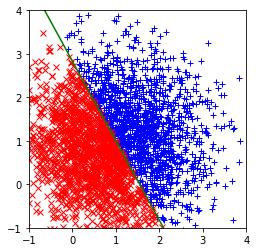

In [52]:
import numpy as np
# Run anaconda powershell and type `conda install -c conda-forge cvxpy`
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate random data
N = 3000
np.random.seed(0)
X = np.random.randn(2, N)  
y = np.sign(X[0,:])
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])

# Linear program
a = cp.Variable(2)
b = cp.Variable(1)
prob = cp.Problem(cp.Minimize(0), [cp.multiply(y,(X.T@a+b))>=1])
p_star = prob.solve(solver='ECOS')
a, b = a.value, b.value

plt.plot(X[0,y==1],X[1,y==1],color='blue',marker='+',linestyle='None')
plt.plot(X[0,y==-1],X[1,y==-1],color='red',marker='x',linestyle='None')
xx = np.arange(-1,4)
plt.plot(xx,-(a[0]*xx+b)/a[1],color='green')
plt.xlim((-1,4))
plt.ylim((-1,4))
plt.gca().set_aspect(aspect=1)
plt.show()

In [6]:
# Generate random data
def get_Xy(N, seed=0):
    np.random.seed(seed)
    X = np.random.randn(2,N)
    y = np.sign(X[0,:])
    theta = np.random.rand() + 1
    c, s = np.cos(theta), np.sin(theta)
    X = np.array([[c, -s], [s, c]])@X
    X = X + np.array([[1],[1]])
    return X, y

In [28]:
def plot_Xy(X, y, a=None, b=None):
    plt.cla()
    plt.plot(X[0, y==1], X[1, y==1], color='blue', marker='+', linestyle='None')
    plt.plot(X[0, y==-1], X[1, y==-1], color='red', marker='x', linestyle='None')

    x_min, y_min = np.min(X, axis=1) - 0.1
    x_max, y_max = np.max(X, axis=1) + 0.1

    if a is not None and b is not None:
        x_range = np.arange(x_min, x_max, 0.1)
        plt.plot(x_range, -(a[0]*x_range+b)/a[1], color='green')

    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.show()
    

In [53]:
N = 8
X, y = get_Xy(N)
#Linear program
a = cp.Variable(2)
b = cp.Variable(1)
p_star = cp.Problem(cp.Minimize(0), [cp.multiply(y,(X.T@a+b))>=1]).solve(solver='ECOS')
a, b = a.value, b.value

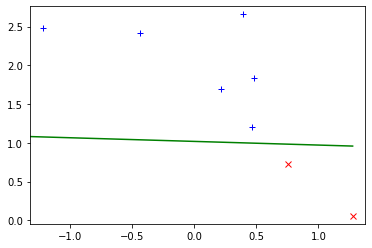

In [54]:
plot_Xy(X, y, a, b)

# Support vector machine (SVM) for separable data

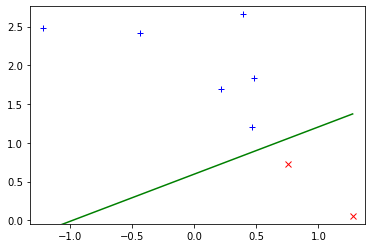

In [55]:
# Generate random data
N = 8
X, y = get_Xy(N)

#QCQP
a = cp.Variable(2)  # a= (a_1, a_2, ..., a_n)  ||a||^2 = a_1^2+...+a_n^2
b = cp.Variable(1)
prob = cp.Problem(cp.Minimize(cp.sum_squares(a)), [cp.multiply(y,(X.T@a+b))>=1])  
# N-dimensional and each component satisfies y_i (a^T x_i+b)>=1
p_star = prob.solve(solver='SCS')
a, b = a.value, b.value

plot_Xy(X, y, a, b)

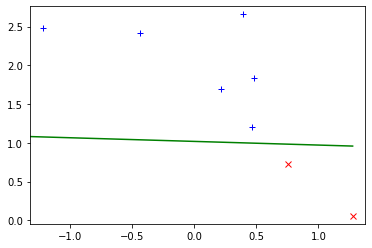

In [56]:
#Linear program
a = cp.Variable(2)
b = cp.Variable(1)
p_star = cp.Problem(cp.Minimize(0), [cp.multiply(y,(X.T@a+b))>=1]).solve(solver='ECOS')
a, b = a.value, b.value
plot_Xy(X, y, a, b)

# Support vector machine (SVM) for nonseparable data

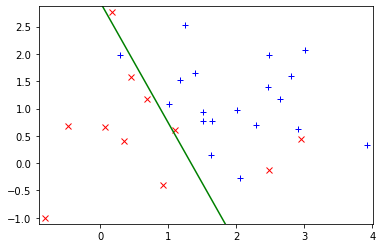

In [75]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate non-separable random data
N = 30
np.random.seed(0)
X = np.random.randn(2, N)
y = np.sign(X[0,:])
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])

perm = np.random.permutation(np.arange(N))
y[perm[:(N//4)]] = 2*np.random.randint(2,size=(N//4))-1
theta = 0.5

#QCQP
a = cp.Variable(2)
b = cp.Variable(1)
z = cp.Variable(N)
C = 100000
constr = [z>=1-cp.multiply(y,(X.T@a+b))]
constr += [z>=0]

prob = cp.Problem(cp.Minimize(cp.sum_squares(a)+C*sum(z)), constr)
p_star = prob.solve(solver='SCS')
a, b = a.value, b.value

plot_Xy(X, y, a, b)